In [21]:
# Explore DFTs with only even-m or only odd-m harmonics based on Shao & Johnson 2008

import numpy as np
import matplotlib.pyplot as plt

In [22]:
# define FFTW methods

def dft(x):
    n = len(x)
    y = np.zeros([n], dtype=np.complex128)
    for k in range(n):
        for j in range(n):
            y[k] += x[j] * np.exp(-2j*np.pi* j * k / n)
    return y

def redft00(x):
    n = len(x)
    y = np.zeros([n])
    for k in range(n):
        y[k] = x[0] + (-1)**k * x[n-1]
        for j in range(1, n-1):
            y[k] += 2.0 * x[j] * np.cos(np.pi*j*k/(n-1))
    return y

def redft10(x):
    N = len(x)
    c = np.zeros([N])
    for k in range(N):
        for n in range(N):
            c[k] += 2.0 * x[n] * np.cos(np.pi/N * (n+0.5) * k)
    return c

In [40]:
#nTheta = 18 # --> nTheta2==10
nTheta = 20 # --> nTheta2==11 (nTheta is multiple of 4)

# round down nTheta to nearest even integer
nTheta1 = 2*(nTheta//2)

# symmetric ~half of nTheta1
nTheta2 = nTheta1//2 + 1

# !!! if nTheta2 is odd, nTheta1 is a multiple of 4 !!!

# number of even/odd-indexed grid points
numEven = None
numOdd  = None
if nTheta2%2 == 0:
    # nTheta2 is even
    numEven = nTheta2//2+1
    numOdd  = nTheta2//2
else:
    # nTheta2 is odd
    numEven = (nTheta2+1)//2
    numOdd  = (nTheta2-1)//2
    
print("nTheta1 =", nTheta1)
print("nTheta2 =", nTheta2)
print("numEven =", numEven)
print("numOdd  =", numOdd)

# It seems that always numEven == numOdd+1 ???

nTheta1 = 20
nTheta2 = 11
numEven = 6
numOdd  = 5


In [41]:
# generate odd-indexed input data

np.random.seed(0)
xOdd = np.random.rand(numOdd)

# full-DFT input as in Fig. 1 of Shao&Johnson (2008)
xFullOnlyOdd = np.zeros([4*numOdd])
for i,x in enumerate(xOdd):
    print(i, 2*i+1, 4*numOdd-(2*i+1))
    xFullOnlyOdd[         (2*i+1)] = x
    xFullOnlyOdd[4*numOdd-(2*i+1)] = x

0 1 19
1 3 17
2 5 15
3 7 13
4 9 11


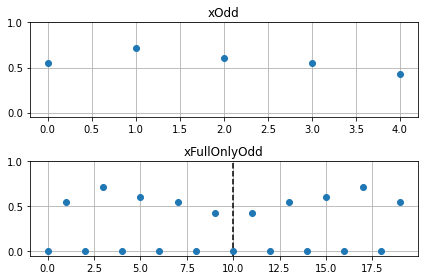

In [42]:
# plot odd-indexed data

plt.figure()

plt.subplot(2,1,1)
plt.plot(xOdd, 'o')
plt.grid(True)
plt.title("xOdd")
plt.ylim((-0.05, 1.0))

plt.subplot(2,1,2)
plt.axvline(1+2*(numOdd-0.5), c='k', ls='--') # REDFT10 is even around n-0.5
plt.plot(xFullOnlyOdd, 'o')
plt.grid(True)
plt.title("xFullOnlyOdd")
plt.ylim((-0.05, 1.0))

plt.tight_layout()

In [43]:
# transform odd-indexed data
cOdd         = redft10(xOdd)
cFullOnlyOdd =   dft  (xFullOnlyOdd)

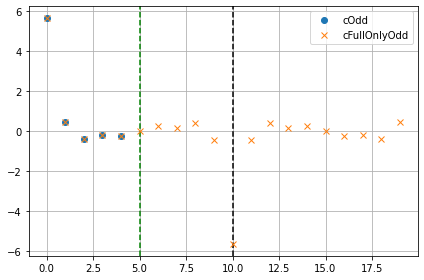

In [44]:
# plot transform result of odd-indexed data
# note that this is both real-even around nTheta3
# but also real-odd around numOdd
plt.figure()
plt.axvline(2*numOdd, c='k', ls='--')
plt.axvline(numOdd, c='g', ls='--')
plt.plot(cOdd,              'o', label='cOdd')
plt.plot(cFullOnlyOdd.real, 'x', label='cFullOnlyOdd')
plt.grid(True)
plt.legend(loc='upper right')

plt.tight_layout()

In [45]:
# generate even-indexed data

np.random.seed(3)
xEven = np.random.rand(numEven)

fullNumEven = None
#if nTheta3%2 == 0:
fullNumEven = 4*(numEven-1)
#else:
#    fullNumEven = 4*numEven

xFullOnlyEven = np.zeros([fullNumEven])
for i,x in enumerate(xEven):
    xFullOnlyEven[            2*i] = x
    if (nTheta2%2 == 0 and i > 0 and i < numEven-1) or (nTheta2%2 == 1 and i>0):
        print(i, 2*i, fullNumEven-2*i)
        xFullOnlyEven[fullNumEven-2*i] = x
    else:
        print(i, 2*i)

0 0
1 2 18
2 4 16
3 6 14
4 8 12
5 10 10


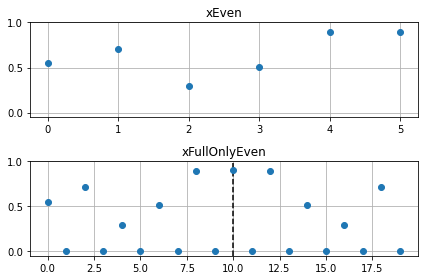

In [46]:
# plot even-indexed data

plt.figure()

plt.subplot(2,1,1)
plt.plot(xEven, 'o')
plt.grid(True)
plt.title("xEven")
plt.ylim((-0.05, 1.0))

plt.subplot(2,1,2)
plt.axvline(2*(numEven-1), c='k', ls='--') # REDFT00 is even around n-1
plt.plot(xFullOnlyEven, 'o')
plt.grid(True)
plt.title("xFullOnlyEven")
plt.ylim((-0.05, 1.0))

plt.tight_layout()

In [30]:
print(len(xFullOnlyOdd))
print(len(xFullOnlyEven))

20
20


In [47]:
# transform even-indexed data
cEven     = redft00(xEven)
cFullOnlyEven =   dft  (xFullOnlyEven)

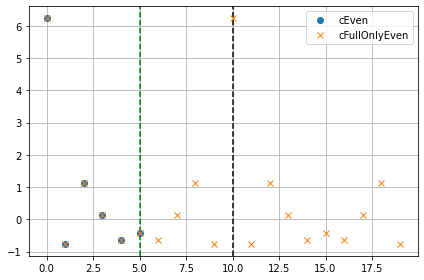

In [48]:
# plot transform of even-indexed data

plt.figure()
plt.axvline(2*(numEven-1), c='k', ls='--')
plt.axvline((numEven-1),   c='g', ls='--')
plt.plot(cEven,              'o', label='cEven')
plt.plot(cFullOnlyEven.real, 'x', label='cFullOnlyEven')
plt.grid(True)
plt.legend(loc='upper right')

plt.tight_layout()

In [33]:
# try to combine into full real-even DFT

fullArray = np.zeros([nTheta1+2])
for i in range(nTheta1+2):
    if i%2 == 0:
        # even
        fullArray[i] = xFullOnlyEven[i]
    else:
        # odd
        fullArray[i] = xFullOnlyOdd[i]

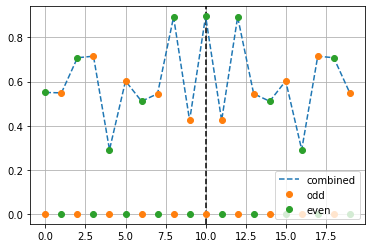

In [34]:
# plot full input array

plt.figure()
plt.axvline(nTheta2, ls='--', c='k')
plt.plot(fullArray,    "--", label='combined')
plt.plot(xFullOnlyOdd,  "o", label='odd')
plt.plot(xFullOnlyEven, "o", label='even')
plt.legend(loc='lower right')
plt.grid(True)

In [35]:
# compute DFT of full array

fullDFT = dft(fullArray)

In [36]:
#plot DFT of full array and combined DFT parts

cNew  = cEven[:-1].real + cOdd.real
cNewC = cEven[-1].real
cNew2 = cEven[:-1].real - cOdd.real

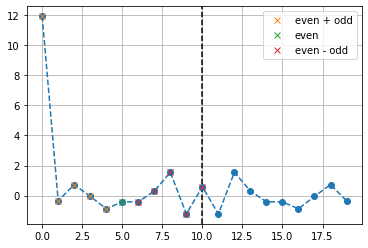

In [37]:
plt.figure()
plt.axvline(2*numOdd, ls='--', c='k')
plt.plot(fullDFT.real, 'o--')
plt.plot(np.arange(numOdd), cNew, 'x', label='even + odd')
plt.plot(numOdd, cNewC, 'x', label='even')
plt.plot(np.arange(numOdd+1,2*numOdd+1), cNew2[::-1], 'x', label='even - odd')
plt.grid(True)
plt.legend()

In [38]:
# compute contributions from even and odd harmonics

cEvenOnly = np.zeros([2*numOdd+1])
cOddOnly  = np.zeros([2*numOdd+1])

cEvenOnly[:numOdd+1] = cEven.real
cEvenOnly[numOdd:]   = cEven[::-1].real

cOddOnly[:numOdd]  =  cOdd.real
cOddOnly[numEven:] = -cOdd[::-1].real

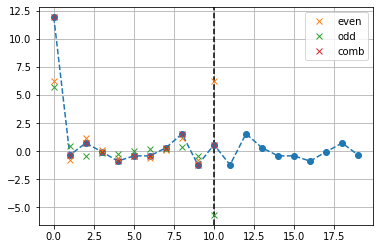

In [39]:
plt.figure()
plt.axvline(2*numOdd, ls='--', c='k')
plt.plot(fullDFT.real, 'o--')
plt.plot(np.arange(2*numOdd+1), cEvenOnly, 'x', label='even')
plt.plot(np.arange(2*numOdd+1), cOddOnly, 'x', label='odd')
plt.plot(np.arange(2*numOdd+1), cEvenOnly+cOddOnly, 'x', label='comb')
plt.grid(True)
plt.legend()